## K-Means Clustering
- Clusters groups of datapoints
- Works without pre-defined labels
- Uses **centroid** points to draw hyperplane, that will be equidistant from the centroids
- Hyperplane will divide the clusters based on their properties

### In 2D Plane

Consider 2 centroid points **a(x1, y1)** and **b(x2, y2)**. The hyperplane drawn will be equidistant from a and b. So it'll be perpendicular in nature, thus giving the slope of both the lines(line joining a&b and hyperplane) **-1 (m1*m2=-1)**

WKT, 

     > y=mx+b

     > m1=(dy/dx) or (y2-y1)/(x2-x1)
     
     > m2=-1/m1 or -( (x2-x1)/(y2-y1) ) or (x1-x2)/(y2-y1)
     
     > x=x1+x2/2 aka xp(x-point)
     
     > y=y1+y2/2 aka yp(y-point)
     
     
Therefore,**b = y - m x**

            > (y1+y2)/2 - ( (x1-x2)/(y2-y1) * x1+x2/2 )
        

### In 3D Plane

**Since z-axis comes into picture we use directional vector**
- n = (x2-x1, y2-y1, z2-z1)

- x=x1+x2/2 aka xp(x-point)

- y=y1+y2/2 aka yp(y-point)

- z=z1+z2/2 aka zp(z-point)

Therefore, 3D hyperplane = (x2-x1)(x-xp) + (y2-y1)(y-yp) + (z2-z1)(z-zp) this equals 0

In [31]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import pandas as pd
from time import time

In [4]:
bc = load_breast_cancer()
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
X = scale(bc.data) # to remove e-01 or e-02
y = bc.target
print(X.shape)
y.shape

(569, 30)


(569,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6)

model = KMeans(n_clusters=2, random_state=0) 

In [15]:
model.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [16]:
pred = model.predict(X_test)

In [17]:
labels = model.labels_

In [18]:
print(labels)
print(pred)
print(accuracy_score(y_test, pred))
print(y_test)

[1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1
 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0
 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0
 1 1 1 0 0 0 0 1 1 1 1 1 

In [20]:
pd.crosstab(y_train, labels) #row, column
# this is done to check if the model has labelled the cluster correctly or not. row_0 is 'y_train' and col_0 is 'lables'.
#175 instances of actual 0(y_train) is labelled as 0 by the model(labels) ->TRUE CASE
#36 instances of actual 0(y_train) is labelled as 1 by the model(labels) ->FALSE CASE
#13 instances of actual 1(y_train) is labelled as 0 by the model(labels) ->FALSE CASE
#339 instances of actual 1(y_train) is labelled as 1 by the model(labels) ->TRUE CASE
#NOTE: If there are more instances with wrong labelling, just FLIP the pred. 0->1 and 1->0

col_0,0,1
row_0,,
0,175,36
1,13,339


### IRIS DATASET

In [32]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [33]:
k_means_5 = KMeans(n_clusters=5)
k_means_5.fit(X_iris)
iris_labels = k_means_5.labels_

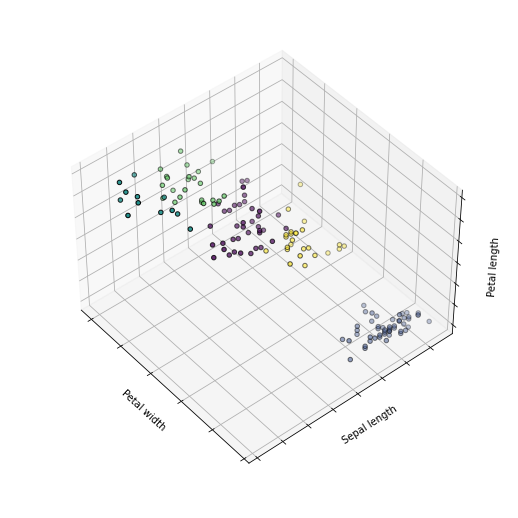

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(14, 7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=45, azim=140)
ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=iris_labels.astype(float), edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.dist=12

# ---

### Specify K --- Select K data points --- Compute centroids --- Find optimal centroid --- Plot

### Centering Clusters


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [56]:
X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=0)

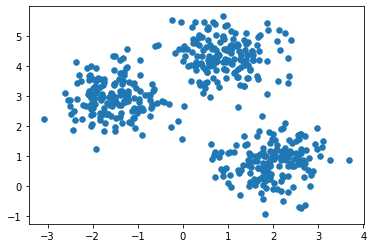

In [57]:
plt.scatter(X[:, 0], X[:, 1], s=30);
plt.show()

In [58]:
kmeans = KMeans(3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [59]:
print(y.shape)
X.shape

(500,)


(500, 2)

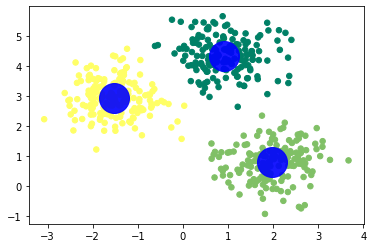

In [60]:
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='summer', c=y_pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=900, c='blue', alpha=0.9)
plt.show()

### Digit recognizing

In [39]:
from sklearn.datasets import load_digits
digit = load_digits()

In [42]:
digit.data.shape

(1797, 64)

In [47]:
digit.target.shape

(1797,)

In [61]:
kmeans = KMeans(10)
clusters = kmeans.fit_predict(digit.data)
kmeans.cluster_centers_.shape

(10, 64)

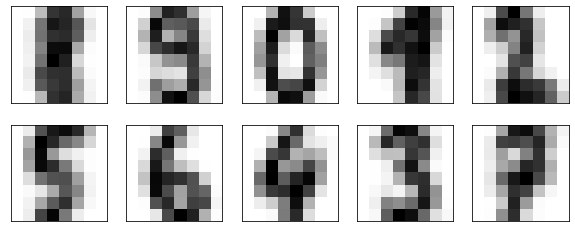

In [64]:
fig, ax = plt.subplots(2, 5, figsize=(10,4))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Mall customers

In [65]:
import pandas as pd

In [71]:
df = pd.read_csv('datasets/mall_customers.csv')
print(df.isna().sum())
df.describe()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [90]:
data = df[['Annual_Income_(k$)', 'Spending_Score']]
data

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [83]:
find_k = []
for i in range(1, 11):
    mall_cluster = KMeans(n_clusters=i, random_state=10)
    mall_cluster.fit(data)
    find_k.append(mall_cluster.inertia_)

C:\Users\ankan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


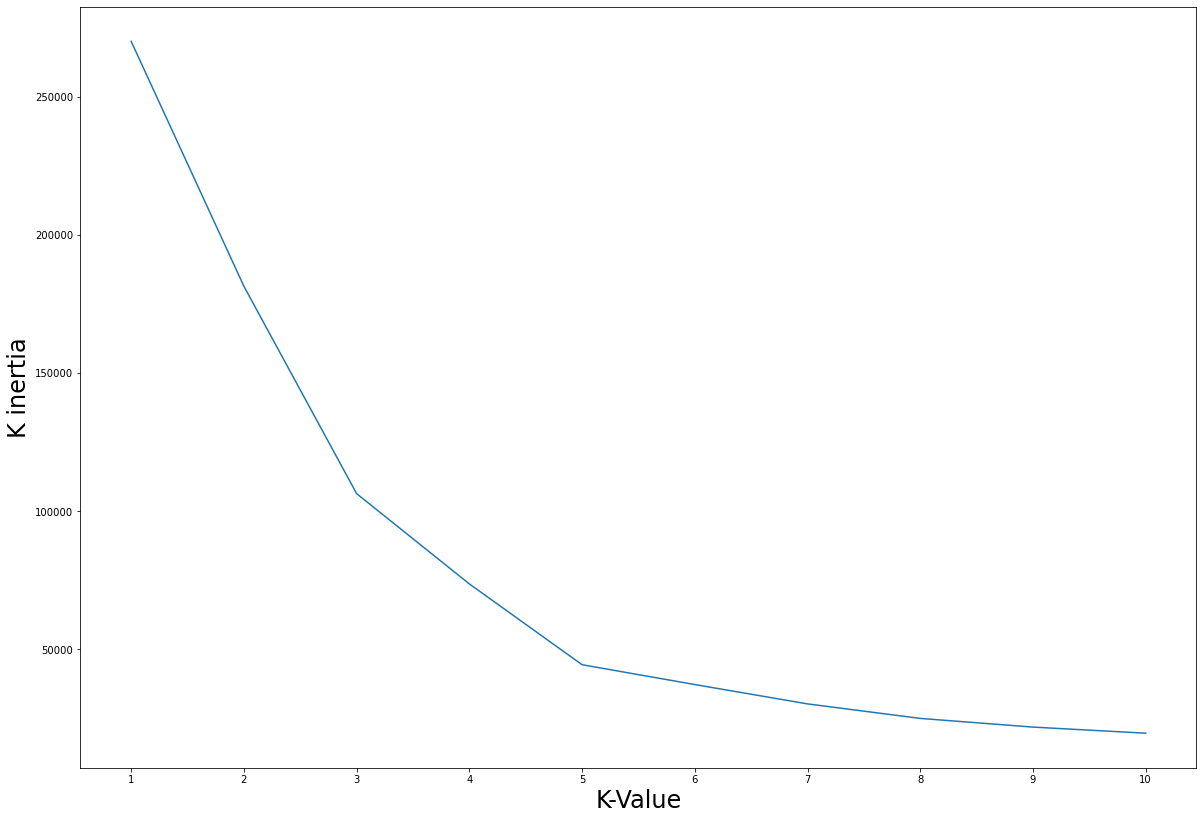

In [84]:
plt.figure(figsize=(20,14))
plt.plot(range(1,11), find_k)
plt.xlabel('K-Value', fontsize=24)
plt.ylabel('K inertia', fontsize=24)
plt.xticks(range(1,11))
plt.show()

In [103]:
#k-value=5
mall_cluster = KMeans(n_clusters=5, random_state=10)
# mall_cluster.fit(data)
y_kmeans = mall_cluster.fit_predict(data)
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [105]:
X = data
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'violet', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

TypeError: '(array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]), 0)' is an invalid key